In [12]:
"""
output of one to all plots
modified from: allenadultmouseISH/visonetoall_twentyfour.ipynb

Shaina Lu
Zador & Gillis Lab
June 2020
"""

'\noutput of one to all plots\nmodified from: allenadultmouseISH/visonetoall_twentyfour.ipynb\n\nShaina Lu\nZador & Gillis Lab\nJune 2020\n'

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [14]:
#function for matplotlib formatting
def set_style():
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

In [15]:
def read_data(ONEVALL_PATH, ALLVALL_PATH, CROSS_PATH):
    onevall = pd.read_csv(ONEVALL_PATH, sep=',')
    
    allvall = pd.read_csv(ALLVALL_PATH, sep=',')
    allvall = allvall.set_index(allvall.columns)

    crossall = pd.read_csv(CROSS_PATH, sep=',')
    crossall = crossall.set_index(crossall.columns)
    
    return onevall, allvall, crossall

In [37]:
#code to look at sizes of brain areas
def getsizes(propont, test_allbyall):
    propont = propont.loc[:,test_allbyall.columns] 
    sizes = propont.sum()
    
    totnumsamples = pd.DataFrame(index=list(test_allbyall), columns=list(test_allbyall))
    totnumsamples = totnumsamples.fillna(0)
    minnumsamples = pd.DataFrame(index=list(test_allbyall), columns=list(test_allbyall))
    minnumsamples = minnumsamples.fillna(0)
    maxnumsamples = pd.DataFrame(index=list(test_allbyall), columns=list(test_allbyall))
    maxnumsamples = maxnumsamples.fillna(0)

    areas = list(test_allbyall)
    #for each column, brain area
    for i in range(test_allbyall.shape[1]):
        #for each row in each column
        for j in range(i+1,test_allbyall.shape[1]): #upper triangular!
            area1 = areas[i]
            area2 = areas[j]
            totnumsamples.iloc[i,j] = sizes[area1] + sizes[area2]
            if sizes[area1] >= sizes[area2]:
                minnumsamples.iloc[i,j] = sizes[area2]
                maxnumsamples.iloc[i,j] = sizes[area1]
            else:
                minnumsamples.iloc[i,j] = sizes[area1]
                maxnumsamples.iloc[i,j] = sizes[area2]
                
    return totnumsamples, minnumsamples, maxnumsamples

In [57]:
def aurocbysize(size, allbyall, xlabel, ylabel, savefile):
    size = size.values
    size = size[np.triu_indices_from(size,k=1)]
    allbyall = allbyall.values
    allbyall = allbyall[np.triu_indices_from(allbyall,k=1)]
    
    plt.scatter(size, allbyall, s=0.5, rasterized=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if savefile != 0:
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()

# ST to ABA linear regression (alpha=0)

In [16]:
ST_ONEVALL_0 = "/home/slu/spatial/data/onetoall_lasso/onetoall_onevallST0_061320.csv"
ST_ALLVALL_0 = "/home/slu/spatial/data/onetoall_lasso/onetoall_allvallST0_061320.csv"
STtoABA_0 = "/home/slu/spatial/data/onetoall_lasso/onetoall_STtoABA0_061320.csv"

In [17]:
ST0onevall, ST0allvall, STtoABA0 = read_data(ST_ONEVALL_0, ST_ALLVALL_0, STtoABA_0)

In [18]:
ST0onevall.test.mean()

0.6131321910913764

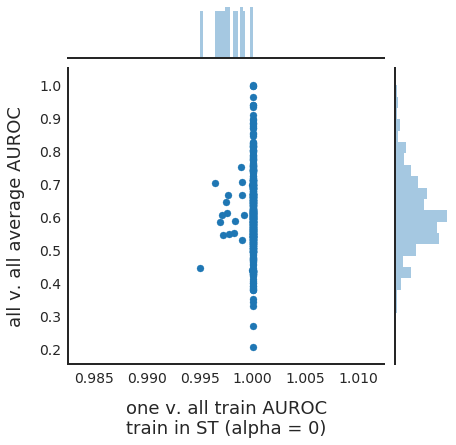

In [31]:
g = sns.jointplot(ST0onevall.train, ST0allvall.mean(axis=1))
g.set_axis_labels("one v. all train AUROC\ntrain in ST (alpha = 0)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.0)
g.ax_marg_x.set_ylim(0, 1.1)
plt.show()

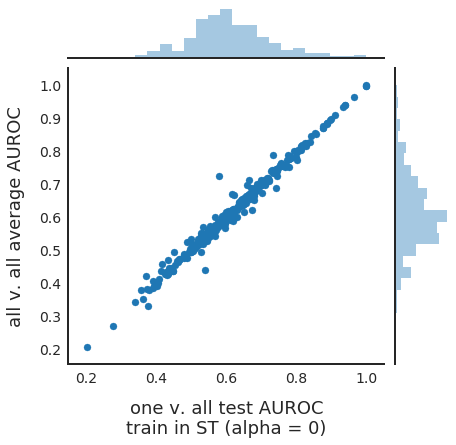

In [36]:
g = sns.jointplot(ST0onevall.test, ST0allvall.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ST (alpha = 0)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("061520_7.pdf", bbox_inches='tight')
plt.show()

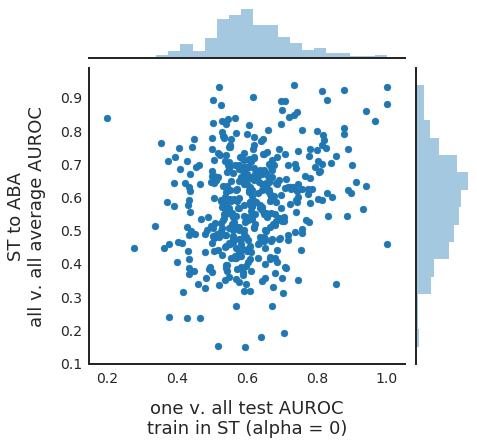

In [37]:
g = sns.jointplot(ST0onevall.test, STtoABA0.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ST (alpha = 0)", "ST to ABA\nall v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim0, 1.1)
plt.savefig("061520_8.pdf", bbox_inches='tight')
plt.show()

__investigate AUROCs = 0__

In [ ]:
ST_CANTIN_FILT_PATH = "/home/slu/spatial/data/cantin_ST_filt_v2.h5"
STpropont = pd.read_hdf(ST_CANTIN_FILT_PATH, key='STpropont', mode='r')

In [ ]:
totalST, minsampsST, maxsampsST = getsizes(STpropont, ST0allvall)

In [39]:
print(np.where(ST0onevall == 0))
print(np.where(ST0allvall == 0))
print(np.where(STtoABA0 == 0))

(array([], dtype=int64), array([], dtype=int64))
(array([ 25,  28,  29,  30,  39,  39,  39,  39,  39,  39,  39,  39,  41,
        41,  42,  42,  43,  45,  56,  56,  56,  60,  78,  88, 111, 111,
       120, 131, 134, 134, 137, 162, 164, 171, 177, 177, 180, 180, 183,
       183, 196, 226, 226, 226, 229, 239, 298, 298, 298, 304, 304, 304,
       304, 304, 315, 315, 327, 336, 336, 336, 336, 336, 374, 383, 395,
       395, 413]), array([443, 239, 340, 131,  59, 149, 181, 224, 226, 239, 269, 437, 249,
       395, 415, 433,  71,  53, 166, 434, 437, 249, 131, 340, 149, 415,
       395, 249, 166, 239, 417, 239, 433, 433, 357, 433, 340, 433, 224,
       443, 213, 342, 383, 415, 433, 433, 318, 340, 437, 317, 318, 433,
       440, 443, 340, 415, 434, 362, 383, 395, 431, 434, 431, 437, 415,
       441, 415]))
(array([ 23,  28,  39,  39,  79,  79,  82,  82,  90,  90,  90,  90,  90,
       181, 224, 224, 239, 306, 306, 306, 306, 306, 306, 318, 318, 318,
       318, 321, 353, 357, 389, 420, 434]), arr

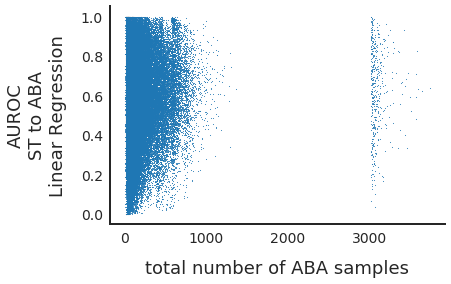

In [78]:
aurocbysize(totalABA, STtoABA0, "total number of ABA samples", "AUROC\nST to ABA\nLinear Regression", "041421_4.pdf")

In [45]:
total.values[np.where(ST0allvall == 0)[0],np.where(ST0allvall == 0)[1]]

array([29., 24., 24., 16., 16., 20., 16., 19., 18., 16., 20., 16., 19.,
       22., 20., 20., 36., 37., 14., 12., 12., 14., 37., 30., 24., 20.,
       31., 13., 32., 30., 73., 21., 24., 22., 26., 25., 30., 29., 29.,
       33., 26., 17., 14., 14., 33., 12., 16., 15., 14., 21., 19., 17.,
       19., 24., 15., 14., 13., 17., 16., 20., 19., 16., 31., 12., 16.,
       20., 18.])

In [46]:
total.values[np.where(STtoABA0 == 0)[0],np.where(STtoABA0 == 0)[1]]

array([ 16.,  30.,  30.,  20.,  27.,  36.,  25.,  21.,  46.,  32.,  36.,
        40.,  45., 103.,  31.,  34.,  42.,  32.,  36.,  28.,  41.,  31.,
        32.,  18.,  33.,  27.,  49.,  41.,  61.,  13.,  29.,  52.,  14.])

In [75]:
totalABA, minsampsABA, maxsampsABA = getsizes(ABApropont, ABA0allvall)

In [77]:
totalABA.values[np.where(STtoABA0 == 0)[0],np.where(STtoABA0 == 0)[1]]

array([27., 28., 33., 17., 56., 56., 29., 45., 64., 48., 48., 53., 48.,
       93., 42., 45., 52., 24., 29., 27., 24., 45., 28., 20., 35., 24.,
       65., 32., 67., 19., 33., 45., 25.])

# ST to ABA LASSO (alpha=0.01)

In [8]:
ST_ONEVALL_0p01 = "/home/slu/spatial/data/onetoall_lasso/onetoall_onevallST0p01_061220.csv"
ST_ALLVALL_0p01 = "/home/slu/spatial/data/onetoall_lasso/onetoall_allvallST0p01_061220.csv"
STtoABA_0p01 = "/home/slu/spatial/data/onetoall_lasso/onetoall_STtoABA0p01_061220.csv"

In [9]:
ST0p01onevall, ST0p01allvall, STtoABA0p01 = read_data(ST_ONEVALL_0p01, ST_ALLVALL_0p01, STtoABA_0p01)

In [57]:
ST0p01onevall.train.mean()

0.5540931687777291

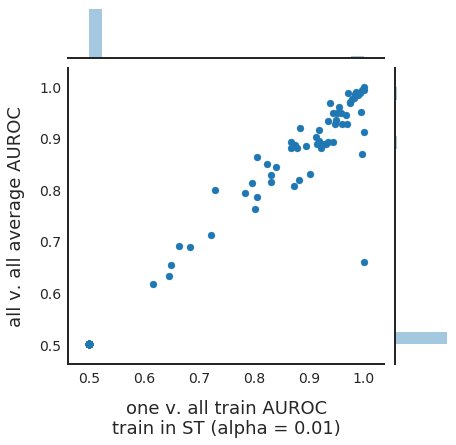

In [43]:
g = sns.jointplot(ST0p01onevall.train, ST0p01allvall.mean(axis=1))
g.set_axis_labels("one v. all train AUROC\ntrain in ST (alpha = 0.01)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.0)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("061520_9.pdf", bbox_inches='tight')
plt.show()

Interesting that there is a trend between the trian and all v. all. Indicates (1) failure to train a perfect performing model (AUROC < 1) and (2) when a model can be trained even without perfect performance, performance holds in all v. all case.

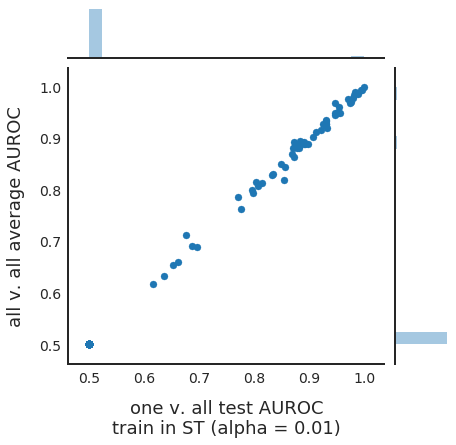

In [44]:
g = sns.jointplot(ST0p01onevall.test, ST0p01allvall.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ST (alpha = 0.01)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("061520_10.pdf", bbox_inches='tight')
plt.show()

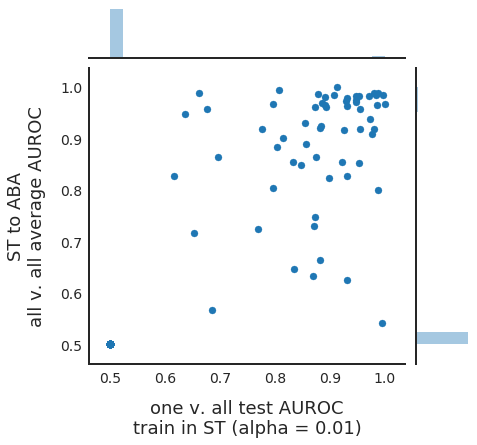

In [45]:
g = sns.jointplot(ST0p01onevall.test, STtoABA0p01.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ST (alpha = 0.01)", "ST to ABA\nall v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim0, 1.1)
plt.savefig("061520_11.pdf", bbox_inches='tight')
plt.show()

# ST to ABA LASSO (alpha=0.05)

In [10]:
ST_ONEVALL_0p05 = "/home/slu/spatial/data/onetoall_lasso/onetoall_onevallST0p05_062220.csv"
ST_ALLVALL_0p05 = "/home/slu/spatial/data/onetoall_lasso/onetoall_allvallST0p05_062220.csv"
STtoABA_0p05 = "/home/slu/spatial/data/onetoall_lasso/onetoall_STtoABA0p05_062220.csv"

In [11]:
ST0p05onevall, ST0p05allvall, STtoABA0p05 = read_data(ST_ONEVALL_0p05, ST_ALLVALL_0p05, STtoABA_0p05)

In [63]:
ST0p05onevall.train.mean()

0.501057321773477

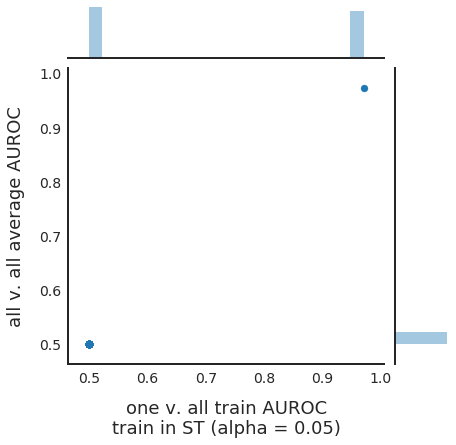

In [19]:
g = sns.jointplot(ST0p05onevall.train, ST0p05allvall.mean(axis=1))
g.set_axis_labels("one v. all train AUROC\ntrain in ST (alpha = 0.05)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.0)
g.ax_marg_x.set_ylim(0, 1.1)
plt.show()

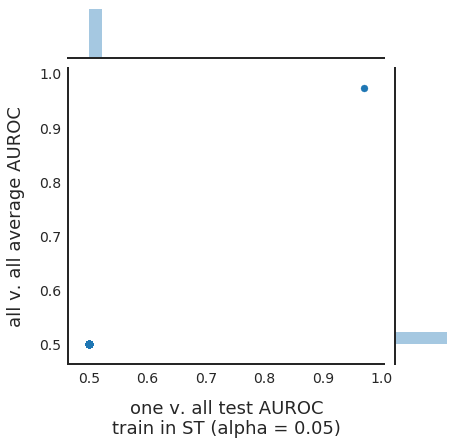

In [46]:
g = sns.jointplot(ST0p05onevall.test, ST0p05allvall.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ST (alpha = 0.05)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("062320_5.pdf", bbox_inches='tight')
plt.show()

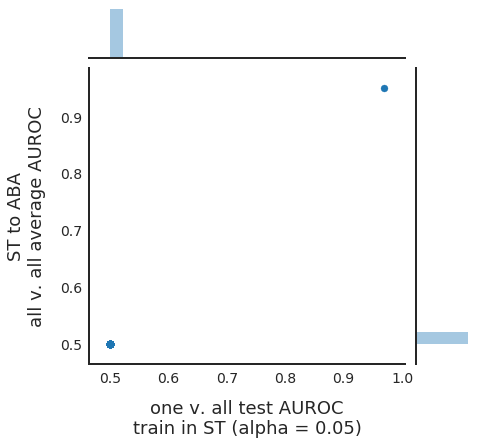

In [21]:
g = sns.jointplot(ST0p05onevall.test, STtoABA0p05.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ST (alpha = 0.05)", "ST to ABA\nall v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim0, 1.1)
plt.savefig("062320_1.pdf", bbox_inches='tight')
plt.show()

# ABA to ST linear regression (alpha=0)

In [62]:
ABA_ONEVALL_0 = "/home/slu/spatial/data/onetoall_lasso/onetoall_onevallABA0_061420.csv"
ABA_ALLVALL_0 = "/home/slu/spatial/data/onetoall_lasso/onetoall_allvallABA0_061420.csv"
ABAtoST_0 = "/home/slu/spatial/data/onetoall_lasso/onetoall_ABAtoST0_061420.csv"

In [63]:
ABA0onevall, ABA0allvall, ABAtoST0 = read_data(ABA_ONEVALL_0, ABA_ALLVALL_0, ABAtoST_0)

In [64]:
ABA0onevall.train.mean()

0.9999737205968979

In [65]:
ABA0onevall.test.mean()

0.9510928156293846

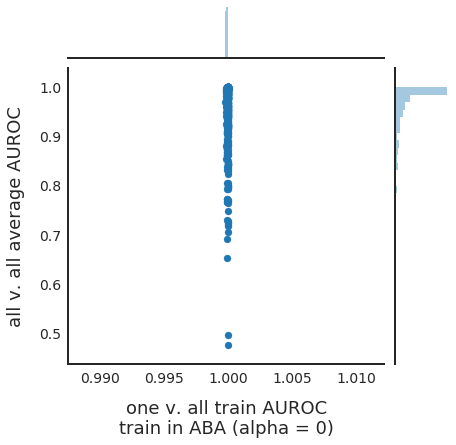

In [54]:
g = sns.jointplot(ABA0onevall.train, ABA0allvall.mean(axis=1))
g.set_axis_labels("one v. all train AUROC\ntrain in ABA (alpha = 0)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.0)
g.ax_marg_x.set_ylim(0, 1.1)
plt.show()

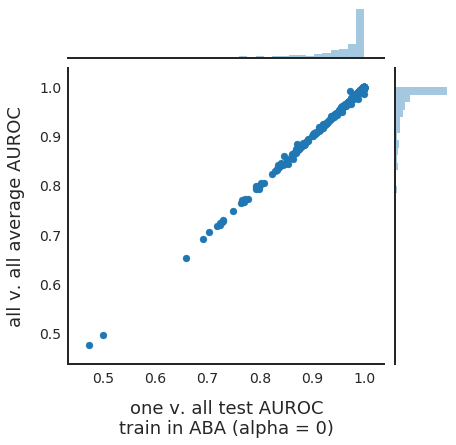

In [55]:
g = sns.jointplot(ABA0onevall.test, ABA0allvall.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ABA (alpha = 0)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("061520_13.pdf", bbox_inches='tight')
plt.show()

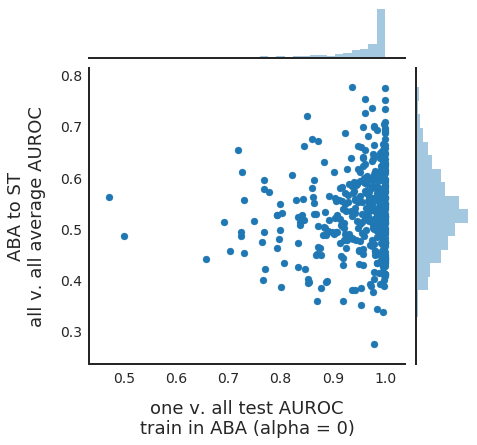

In [56]:
g = sns.jointplot(ABA0onevall.test, ABAtoST0.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ABA (alpha = 0)", "ABA to ST\nall v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim0, 1.1)
plt.savefig("061520_14.pdf", bbox_inches='tight')
plt.show()

__investigate AUROCs = 0__

In [66]:
ABA_FILT_PATH = "/home/slu/spatial/data/ABAISH_filt_v6_avgdup.h5"
ABApropont = pd.read_hdf(ABA_FILT_PATH, key='propontology', mode='r')

In [68]:
total, minsamps, maxsamps = getsizes(ABApropont, ABA0allvall)

In [69]:
print(np.where(ABA0onevall == 0))
print(np.where(ABA0allvall == 0))
print(np.where(ABAtoST0 == 0))

(array([], dtype=int64), array([], dtype=int64))
(array([159, 159]), array([336, 383]))
(array([], dtype=int64), array([], dtype=int64))


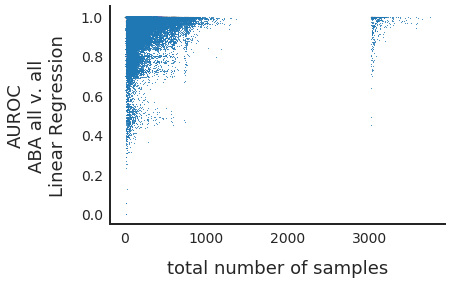

In [70]:
aurocbysize(total, ABA0allvall, "total number of samples", "AUROC\nABA all v. all\nLinear Regression", "041521_3.pdf")

In [72]:
total.values[np.where(ABA0allvall == 0)[0],np.where(ABA0allvall == 0)[1]]

array([17., 20.])

# ABA to ST linear regression (alpha=0.01)

In [14]:
ABA_ONEVALL_0p01 = "/home/slu/spatial/data/onetoall_lasso/onetoall_onevallABA0p01_061320.csv"
ABA_ALLVALL_0p01 = "/home/slu/spatial/data/onetoall_lasso/onetoall_allvallABA0p01_061320.csv"
ABAtoST_0p01 = "/home/slu/spatial/data/onetoall_lasso/onetoall_ABAtoST0p01_061320.csv"

In [15]:
ABA0p01onevall, ABA0p01allvall, ABAtoST0p01 = read_data(ABA_ONEVALL_0p01, ABA_ALLVALL_0p01, ABAtoST_0p01)

In [60]:
ABA0p01onevall.train.mean()

0.5929979217195565

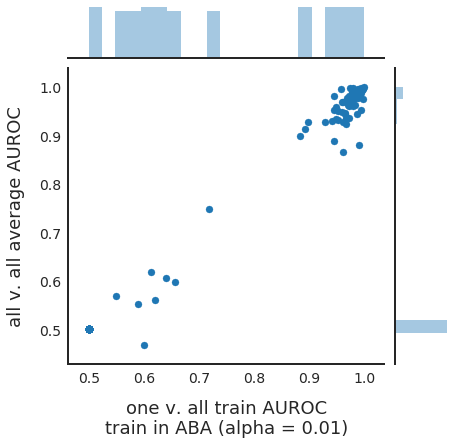

In [15]:
g = sns.jointplot(ABA0p01onevall.train, ABA0p01allvall.mean(axis=1))
g.set_axis_labels("one v. all train AUROC\ntrain in ABA (alpha = 0.01)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.0)
g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("061520_15.pdf", bbox_inches='tight')
plt.show()

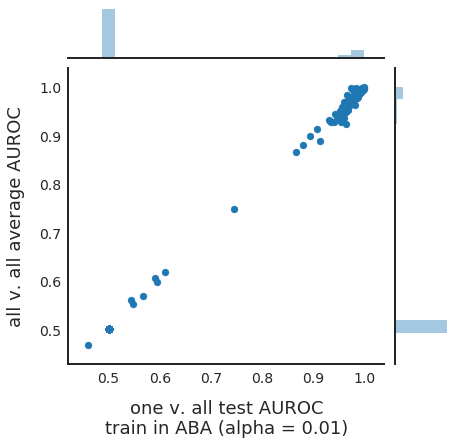

In [62]:
g = sns.jointplot(ABA0p01onevall.test, ABA0p01allvall.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ABA (alpha = 0.01)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("061520_16.pdf", bbox_inches='tight')
plt.show()

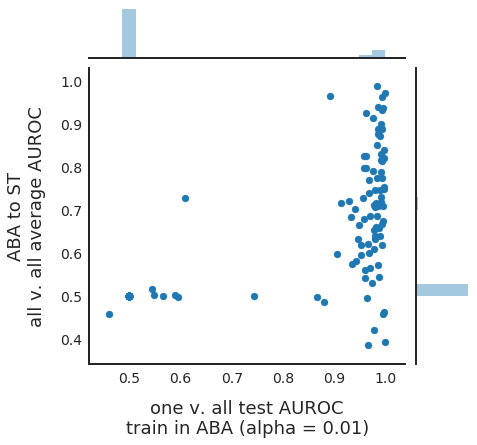

In [63]:
g = sns.jointplot(ABA0p01onevall.test, ABAtoST0p01.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ABA (alpha = 0.01)", "ABA to ST\nall v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim0, 1.1)
plt.savefig("061520_17.pdf", bbox_inches='tight')
plt.show()

# ABA to ST linear regression (alpha=0.05)

In [16]:
ABA_ONEVALL_0p05 = "/home/slu/spatial/data/onetoall_lasso/onetoall_onevallABA0p05_061720.csv"
ABA_ALLVALL_0p05 = "/home/slu/spatial/data/onetoall_lasso/onetoall_allvallABA0p05_061720.csv"
ABAtoST_0p05 = "/home/slu/spatial/data/onetoall_lasso/onetoall_ABAtoST0p05_061720.csv"

In [17]:
ABA0p05onevall, ABA0p05allvall, ABAtoST0p05 = read_data(ABA_ONEVALL_0p05, ABA_ALLVALL_0p05, ABAtoST_0p05)

In [69]:
ABA0p05onevall.train.mean()

0.5020777391372987

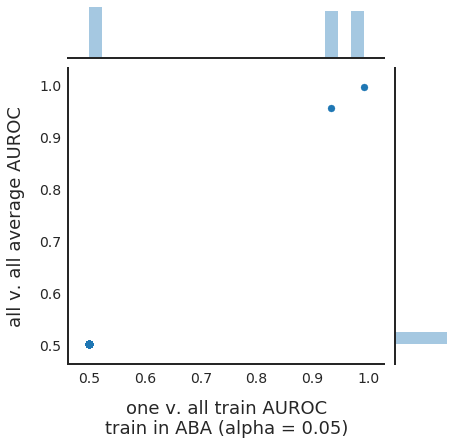

In [13]:
g = sns.jointplot(ABA0p05onevall.train, ABA0p05allvall.mean(axis=1))
g.set_axis_labels("one v. all train AUROC\ntrain in ABA (alpha = 0.05)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.0)
g.ax_marg_x.set_ylim(0, 1.1)
plt.show()

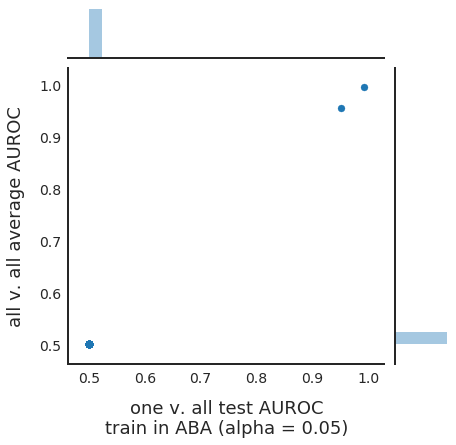

In [14]:
g = sns.jointplot(ABA0p05onevall.test, ABA0p05allvall.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ABA (alpha = 0.05)", "all v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim(0, 1.1)
plt.savefig("062220_1.pdf", bbox_inches='tight')
plt.show()

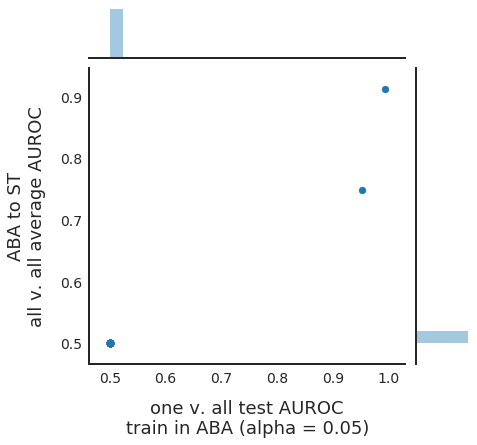

In [15]:
g = sns.jointplot(ABA0p05onevall.test, ABAtoST0p05.mean(axis=1))
g.set_axis_labels("one v. all test AUROC\ntrain in ABA (alpha = 0.05)", "ABA to ST\nall v. all average AUROC")
#g.ax_marg_x.set_xlim(0, 1.1)
#g.ax_marg_x.set_ylim0, 1.1)
plt.savefig("062220_2.pdf", bbox_inches='tight')
plt.show()

# mean distance from y=x line

In [18]:
def distyx(xdata, ydata):
    """takes in x and y data of a scatter plot and returns the average distance from the y=x line"""
    xdata = xdata.values
    ydata= ydata.values
    p1 = np.array([0,0])
    p2 = np.array([1,1])
    dists = []
    for i in range(len(xdata)):
        p3 = np.array([xdata[i],ydata[i]])
        dists.append(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    return np.nanmean(np.abs(dists))

In [19]:
alldist = pd.DataFrame(columns=['data', 'alpha', 'meandist', 'rho'])

In [20]:
#ST0
dist = distyx(ST0onevall.test, ST0allvall.mean(axis=1))
distcross = distyx(ST0onevall.test, STtoABA0.mean(axis=1))

rho = sp.stats.mstats.spearmanr(ST0onevall.test, ST0allvall.mean(axis=1), nan_policy='omit')[0]
rhocross = sp.stats.mstats.spearmanr(ST0onevall.test, STtoABA0.mean(axis=1), nan_policy='omit')[0]

alldist = alldist.append({'data':'ST','alpha':0,'meandist':dist,'rho':rho}, ignore_index=True)
alldist = alldist.append({'data':'STtoABA','alpha':0,'meandist':distcross,'rho':rhocross}, ignore_index=True)

In [21]:
#ST0.01
dist = distyx(ST0p01onevall.test, ST0p01allvall.mean(axis=1))
distcross = distyx(ST0p01onevall.test, STtoABA0p01.mean(axis=1))

rho = sp.stats.mstats.spearmanr(ST0p01onevall.test, ST0p01allvall.mean(axis=1), nan_policy='omit')[0]
rhocross = sp.stats.mstats.spearmanr(ST0p01onevall.test, STtoABA0p01.mean(axis=1), nan_policy='omit')[0]

alldist = alldist.append({'data':'ST','alpha':0.01,'meandist':dist,'rho':rho}, ignore_index=True)
alldist = alldist.append({'data':'STtoABA','alpha':0.01,'meandist':distcross,'rho':rhocross}, ignore_index=True)

In [22]:
#ST0.05
dist = distyx(ST0p05onevall.test, ST0p05allvall.mean(axis=1))
distcross = distyx(ST0p05onevall.test, STtoABA0p05.mean(axis=1))

rho = sp.stats.mstats.spearmanr(ST0p05onevall.test, ST0p05allvall.mean(axis=1), nan_policy='omit')[0]
rhocross = sp.stats.mstats.spearmanr(ST0p05onevall.test, STtoABA0p05.mean(axis=1), nan_policy='omit')[0]

alldist = alldist.append({'data':'ST','alpha':0.05,'meandist':dist,'rho':rho}, ignore_index=True)
alldist = alldist.append({'data':'STtoABA','alpha':0.05,'meandist':distcross,'rho':rhocross}, ignore_index=True)

In [23]:
#ABA0
dist = distyx(ABA0onevall.test, ABA0allvall.mean(axis=1))
distcross = distyx(ABA0onevall.test, ABAtoST0.mean(axis=1))

rho = sp.stats.mstats.spearmanr(ABA0onevall.test, ABA0allvall.mean(axis=1), nan_policy='omit')[0]
rhocross = sp.stats.mstats.spearmanr(ABA0onevall.test, ABAtoST0.mean(axis=1), nan_policy='omit')[0]

alldist = alldist.append({'data':'ABA','alpha':0,'meandist':dist,'rho':rho}, ignore_index=True)
alldist = alldist.append({'data':'ABAtoST','alpha':0,'meandist':distcross,'rho':rhocross}, ignore_index=True)

In [24]:
#ABA0p01
dist = distyx(ABA0p01onevall.test, ABA0p01allvall.mean(axis=1))
distcross = distyx(ABA0p01onevall.test, ABAtoST0p01.mean(axis=1))

rho = sp.stats.mstats.spearmanr(ABA0p01onevall.test, ABA0p01allvall.mean(axis=1), nan_policy='omit')[0]
rhocross = sp.stats.mstats.spearmanr(ABA0p01onevall.test, ABAtoST0p01.mean(axis=1), nan_policy='omit')[0]

alldist = alldist.append({'data':'ABA','alpha':0.01,'meandist':dist,'rho':rho}, ignore_index=True)
alldist = alldist.append({'data':'ABAtoST','alpha':0.01,'meandist':distcross,'rho':rhocross}, ignore_index=True)

In [25]:
#ABA0p01
dist = distyx(ABA0p05onevall.test, ABA0p05allvall.mean(axis=1))
distcross = distyx(ABA0p05onevall.test, ABAtoST0p05.mean(axis=1))

rho = sp.stats.mstats.spearmanr(ABA0p05onevall.test, ABA0p05allvall.mean(axis=1), nan_policy='omit')[0]
rhocross = sp.stats.mstats.spearmanr(ABA0p05onevall.test, ABAtoST0p05.mean(axis=1), nan_policy='omit')[0]

alldist = alldist.append({'data':'ABA','alpha':0.05,'meandist':dist,'rho':rho}, ignore_index=True)
alldist = alldist.append({'data':'ABAtoST','alpha':0.05,'meandist':distcross,'rho':rhocross}, ignore_index=True)

In [26]:
alldist

,data,alpha,meandist,rho
0,ST,0,0.005341,0.990774
1,STtoABA,0,0.092939,0.196930
2,ST,0.01,0.000580,0.999937
3,STtoABA,0.01,0.009313,0.981466
4,ST,0.05,0.000006,0.578654
5,STtoABA,0.05,0.000031,0.578654
6,ABA,0,0.000897,0.991084
7,ABAtoST,0,0.296451,0.075659
8,ABA,0.01,0.000964,0.994554
9,ABAtoST,0.01,0.036631,0.778503


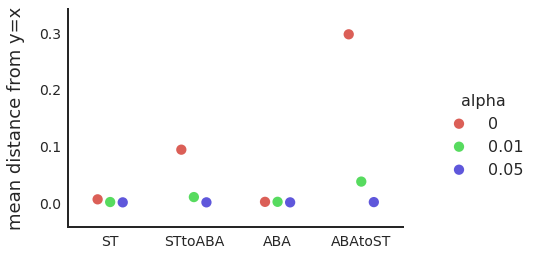

In [29]:
sns.pointplot(x='data', y='meandist', hue='alpha', palette='hls', data=alldist, dodge=0.3, join=False)
plt.ylabel("mean distance from y=x")
plt.xlabel("")
plt.legend(loc=[1.1,0.2], title="alpha", title_fontsize="16")
plt.savefig("072120_1.pdf", bbox_inches='tight')
plt.show()

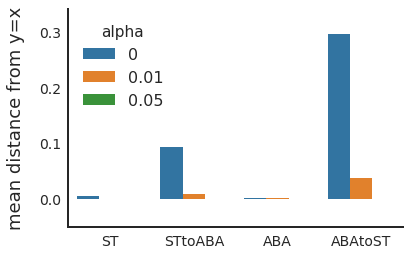

In [49]:
sns.barplot(x='data', y='meandist', hue='alpha', data=alldist)
plt.xlabel("")
plt.ylabel("mean distance from y=x")
plt.ylim([-0.05,0.34])
g.savefig("062320_7.pdf", bbox_inches='tight')
plt.show()

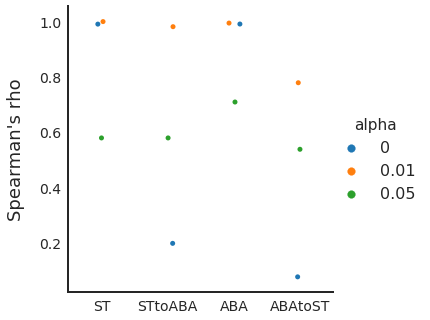

In [28]:
g = sns.catplot(x='data', y='rho', hue='alpha', data=alldist)
g.set_axis_labels("", "Spearman's rho")
g.savefig("062320_3.pdf", bbox_inches='tight')